# Machine Learning for TTC

## Describing the data

In [138]:
import pandas as pd
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

df = pd.read_csv('ttc-data.csv')

df.head(10)

,Report_Date,Route,Time,Day,Location,Incident,Min_Delay,Min_Gap,Direction,Vehicle,Round_Time
0,2014-01-02,505,06:31:00,Thursday,dundas_and_roncesvalles,late_leaving_garage,4.0,8.0,E/B,4018.0,06:30:00
1,2014-01-02,504,12:43:00,Thursday,king_and_shaw,utilized_off_route,20.0,22.0,E/B,4128.0,12:30:00
2,2014-01-02,501,14:01:00,Thursday,kingston_road_and_bingham,held_by,13.0,19.0,W/B,4016.0,14:00:00
3,2014-01-02,504,14:22:00,Thursday,king_st._and_roncesvalles_ave.,investigation,7.0,11.0,W/B,4175.0,14:30:00
4,2014-01-02,504,16:42:00,Thursday,king_and_bathurst,utilized_off_route,3.0,6.0,E/B,4080.0,16:30:00
5,2014-01-02,501,17:39:00,Thursday,queen_and_beaconsfeild,held_by,7.0,13.0,W/B,4202.0,17:30:00
6,2014-01-02,504,18:38:00,Thursday,roncesvalles_and_king_street_west,utilized_off_route,4.0,7.0,E/B,4100.0,18:30:00
7,2014-01-02,510,19:27:00,Thursday,spadina_and_st._andrews,investigation,20.0,22.0,S/B,4123.0,19:30:00
8,2014-01-03,504,01:00:00,Friday,broadview_and_queen,utilized_off_route,7.0,14.0,W/B,4079.0,01:00:00
9,2014-01-03,512,05:09:00,Friday,bathurst_and_st._clair,mechanical,3.0,6.0,E/B,4160.0,05:00:00


In [139]:
df.describe()

,Min_Delay,Min_Gap,Vehicle
count,9077.000000,9075.000000,8577.000000
mean,10.974661,16.521873,4266.468346
std,22.041684,21.190334,1380.678940
min,0.000000,0.000000,0.000000
25%,5.000000,9.000000,4080.000000
50%,6.000000,12.000000,4191.000000
75%,10.000000,18.000000,4446.000000
max,600.000000,535.000000,9446.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report_Date  9080 non-null   object 
 1   Route        9078 non-null   object 
 2   Time         9080 non-null   object 
 3   Day          9080 non-null   object 
 4   Location     9059 non-null   object 
 5   Incident     9080 non-null   object 
 6   Min_Delay    9077 non-null   float64
 7   Min_Gap      9075 non-null   float64
 8   Direction    8982 non-null   object 
 9   Vehicle      8577 non-null   float64
 10  Round_Time   9080 non-null   object 
dtypes: float64(3), object(8)
memory usage: 780.4+ KB


## Data Cleaning

### Dropping if NaN

In [141]:
df = df[df['Min_Delay'].notna()]
df = df[df['Route'].notna()]
df = df[df['Location'].notna()]
df = df[df['Min_Gap'].notna()]
df = df[df['Direction'].notna()]

df.info()

#For testing
#df['Vehicle'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8957 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report_Date  8957 non-null   object 
 1   Route        8957 non-null   object 
 2   Time         8957 non-null   object 
 3   Day          8957 non-null   object 
 4   Location     8957 non-null   object 
 5   Incident     8957 non-null   object 
 6   Min_Delay    8957 non-null   float64
 7   Min_Gap      8957 non-null   float64
 8   Direction    8957 non-null   object 
 9   Vehicle      8462 non-null   float64
 10  Round_Time   8957 non-null   object 
dtypes: float64(3), object(8)
memory usage: 839.7+ KB


## Feature Extraction

### Time in hours after midnight

In [142]:
from datetime import timedelta

time_in_minutes = []
time_in_hours = []

for time in df['Time']:
    time = time.split(":")
    delta = timedelta(hours=int(time[0]), minutes=int(time[1]), seconds=int(time[2]))
    total_seconds = delta.total_seconds()
    time_in_minutes.append(total_seconds/60)
    time_in_hours.append(total_seconds/60/60)

df['Time_in_minutes'] = time_in_minutes
df['Time_in_hours'] = time_in_hours
    
df

,Report_Date,Route,Time,Day,Location,Incident,Min_Delay,Min_Gap,Direction,Vehicle,Round_Time,Time_in_minutes,Time_in_hours
0,2014-01-02,505,06:31:00,Thursday,dundas_and_roncesvalles,late_leaving_garage,4.0,8.0,E/B,4018.0,06:30:00,391.0,6.516667
1,2014-01-02,504,12:43:00,Thursday,king_and_shaw,utilized_off_route,20.0,22.0,E/B,4128.0,12:30:00,763.0,12.716667
2,2014-01-02,501,14:01:00,Thursday,kingston_road_and_bingham,held_by,13.0,19.0,W/B,4016.0,14:00:00,841.0,14.016667
3,2014-01-02,504,14:22:00,Thursday,king_st._and_roncesvalles_ave.,investigation,7.0,11.0,W/B,4175.0,14:30:00,862.0,14.366667
4,2014-01-02,504,16:42:00,Thursday,king_and_bathurst,utilized_off_route,3.0,6.0,E/B,4080.0,16:30:00,1002.0,16.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,2021-01-31,512,22:10:00,Sunday,gunn's_loop,mechanical,5.0,10.0,E,4495.0,22:00:00,1330.0,22.166667
9075,2021-01-31,501,22:43:00,Sunday,queen_and_broadview,emergency_services,11.0,21.0,W,4579.0,22:30:00,1363.0,22.716667
9076,2021-01-31,504,00:15:00,Sunday,king_and_spadina,mechanical,3.0,8.0,W,4461.0,00:30:00,15.0,0.250000
9078,2021-01-31,501,00:46:00,Sunday,queen_and_church,held_by,13.0,23.0,W,4432.0,01:00:00,46.0,0.766667


## Exploring the Data

### Delay in minutes for each hour of day

<AxesSubplot:xlabel='Time_in_hours', ylabel='Min_Delay'>

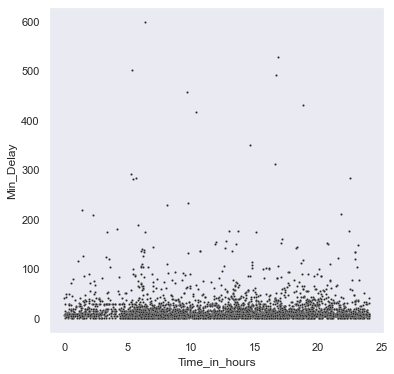

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=df['Time_in_hours'], y=df['Min_Delay'], s=5, color=".15")

### Hour of day Incidents occur

<AxesSubplot:xlabel='Incident', ylabel='Time_in_hours'>

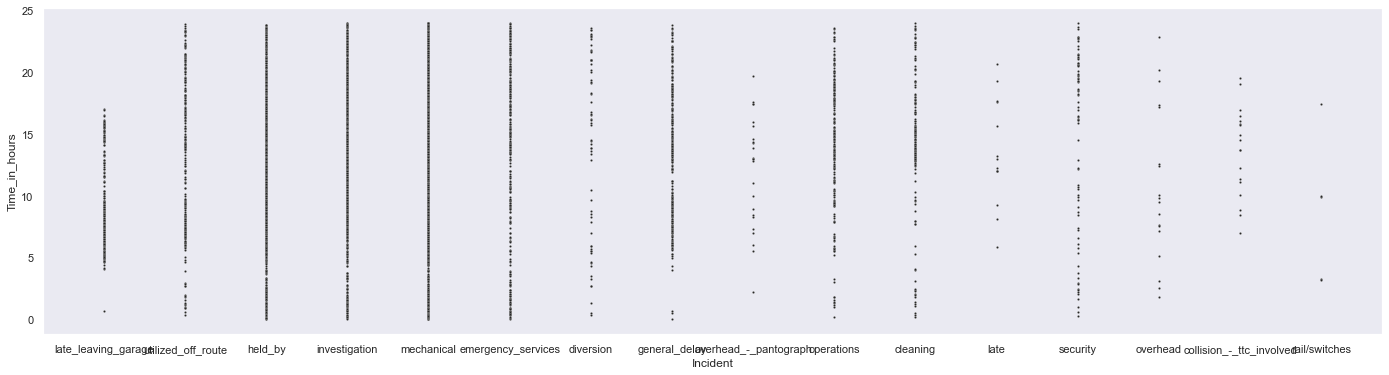

In [144]:
sns.set_theme(style="dark")

f, ax = plt.subplots(figsize=(24, 6))
sns.scatterplot(x=df['Incident'], y=df['Time_in_hours'], s=5, color=".15")

### Day, Hour, Incident, and Delay in minutes

<Figure size 1440x288 with 0 Axes>

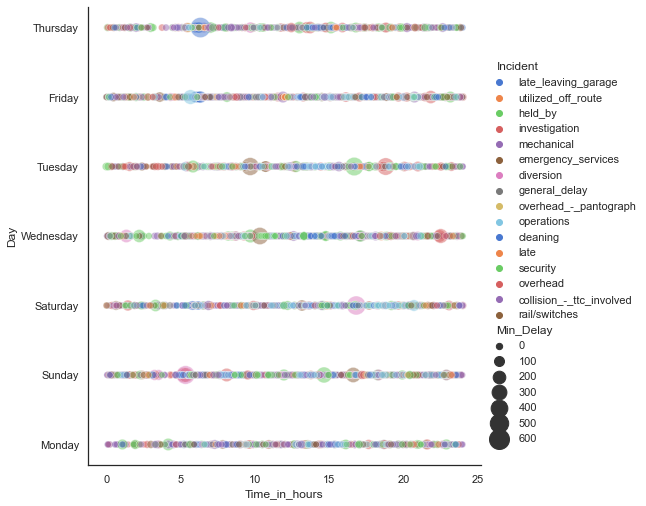

In [145]:
sns.set_theme(style="white")


plt.figure(figsize=(20,4))
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x=df['Time_in_hours'], y=df['Day'], hue=df['Incident'], size=df['Min_Delay'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=7)


## Classification Model - CatBoost

### Preparation

In [146]:
# Splitting
# Dropping unused columns for training
training = df.drop('Report_Date', axis=1)
training = training.drop('Vehicle', axis=1)
training = training.drop('Round_Time', axis=1)
training = training.drop('Time', axis=1)

testing = training.sample(2700, random_state=1) # pick 5000 observations randomly
training = training.drop(testing.index) # Remove holdout from training data

# Splitting training/testing set to feature (X) and labels (y)
train_y = training.Min_Delay
train_X = training.drop('Min_Delay', axis=1)

test_X = testing.drop('Min_Delay', axis=1)

train_X
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6257 entries, 0 to 9079
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Route            6257 non-null   object 
 1   Day              6257 non-null   object 
 2   Location         6257 non-null   object 
 3   Incident         6257 non-null   object 
 4   Min_Gap          6257 non-null   float64
 5   Direction        6257 non-null   object 
 6   Time_in_minutes  6257 non-null   float64
 7   Time_in_hours    6257 non-null   float64
dtypes: float64(3), object(5)
memory usage: 439.9+ KB


### Building the classifier

In [147]:
from catboost import Pool, CatBoostRegressor


cat_features = ['Route', 'Day', 'Location', 'Incident', 'Direction']


train_dataset = Pool(data=train_X,
                     label=train_y,
                     cat_features=cat_features)

catboost_model = CatBoostRegressor(iterations=50,
                           learning_rate=1,
                           depth=10,
                         )

catboost_model.fit(train_dataset)

0:	learn: 13.8248199	total: 2.73ms	remaining: 134ms
1:	learn: 12.3257268	total: 14.1ms	remaining: 339ms
2:	learn: 11.6975610	total: 21.2ms	remaining: 333ms
3:	learn: 11.2653210	total: 31.2ms	remaining: 359ms
4:	learn: 10.9863971	total: 38.2ms	remaining: 344ms
5:	learn: 9.8620617	total: 46.8ms	remaining: 344ms
6:	learn: 9.6035931	total: 53.6ms	remaining: 329ms
7:	learn: 9.3395902	total: 60.8ms	remaining: 319ms
8:	learn: 8.9413434	total: 68.2ms	remaining: 311ms
9:	learn: 8.2968463	total: 75.2ms	remaining: 301ms
10:	learn: 8.1632518	total: 82.1ms	remaining: 291ms
11:	learn: 7.9986074	total: 89.4ms	remaining: 283ms
12:	learn: 7.9214291	total: 95.6ms	remaining: 272ms
13:	learn: 7.7897704	total: 102ms	remaining: 263ms
14:	learn: 7.5751744	total: 108ms	remaining: 253ms
15:	learn: 6.9800538	total: 114ms	remaining: 243ms
16:	learn: 6.8957813	total: 121ms	remaining: 234ms
17:	learn: 6.6904464	total: 127ms	remaining: 225ms
18:	learn: 6.5421479	total: 133ms	remaining: 216ms
19:	learn: 6.3425070	to

## Checking Mean Squared Error

### Predicting against Training set

In [148]:
from sklearn.metrics import mean_squared_error

pred = catboost_model.predict(train_X)
mse = mean_squared_error(train_y, pred)
print(np.sqrt(mse))
#pd.Series(estimated_accuracy).to_csv('ea.csv', index=False, header=False)

8.79166658989845


### Predicting against Testing set

In [149]:
from sklearn.metrics import mean_squared_error

pred = catboost_model.predict(testing.drop('Min_Delay',axis=1))
mse = mean_squared_error(testing['Min_Delay'], pred)
print(np.sqrt(mse))
#pd.Series(estimated_accuracy).to_csv('ea.csv', index=False, header=False)

6.892684648852492


### Baseline

### Predicting against Training set

In [152]:
#create a dict of unique incidents
incidents = df['Incident'].unique()
means = {}

#Find and store mode of Min_Delay minutes of each incident
for i in incidents:
    means[i] = df.loc[df['Incident'] == i]['Min_Delay'].mean()


baseline_pred = []

#Baseline comparison to training set
for incident in training['Incident']:
    baseline_pred.append(means[incident])

#Accuracy test for baseline predictions on training set
mse = mean_squared_error(training['Min_Delay'], baseline_pred)  
print(np.sqrt(mse))


21.484337959656116


### Predicting against Testing set

In [155]:
baseline_pred = []

#Baseline comparison to testing set
for incident in testing['Incident']:
    baseline_pred.append(means[incident])

#Accuracy test for baseline predictions on testing set
mse = mean_squared_error(testing['Min_Delay'], baseline_pred)  
print(np.sqrt(mse))

20.352562627145154


## Classification Model - Simple Decision Tree

### Separating categorical features

In [156]:
cat_data = train_X.drop('Time_in_minutes', axis=1)
cat_data = cat_data.drop('Time_in_hours', axis=1)
cat_data = cat_data.drop('Min_Gap', axis=1)
cat_data['Route'].replace('Rad', 0)
cat_data

,Route,Day,Location,Incident,Direction
0,505,Thursday,dundas_and_roncesvalles,late_leaving_garage,E/B
1,504,Thursday,king_and_shaw,utilized_off_route,E/B
2,501,Thursday,kingston_road_and_bingham,held_by,W/B
3,504,Thursday,king_st._and_roncesvalles_ave.,investigation,W/B
4,504,Thursday,king_and_bathurst,utilized_off_route,E/B
...,...,...,...,...,...
9074,512,Sunday,gunn's_loop,mechanical,E
9075,501,Sunday,queen_and_broadview,emergency_services,W
9076,504,Sunday,king_and_spadina,mechanical,W
9078,501,Sunday,queen_and_church,held_by,W


### Converting data to numerical

In [157]:
#encoded df
num_df = df

for cat in cat_data:
    dummies = pd.get_dummies(train_X[cat])
    num_df = pd.concat([num_df, dummies], axis=1)
    num_df = num_df.drop(cat, axis=1)

num_df = num_df.drop('Report_Date', axis=1)
num_df = num_df.drop('Vehicle', axis=1)
num_df = num_df.drop('Round_Time', axis=1)
num_df = num_df.drop('Time', axis=1)
num_df

,Min_Delay,Min_Gap,Time_in_minutes,Time_in_hours,16,17,2,22,24,3,...,W/B,WB,btw,bw,eb,ee,ew,r,s,wb
0,4.0,8.0,391.0,6.516667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,22.0,763.0,12.716667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.0,19.0,841.0,14.016667,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,11.0,862.0,14.366667,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,6.0,1002.0,16.700000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,5.0,10.0,1330.0,22.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9075,11.0,21.0,1363.0,22.716667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9076,3.0,8.0,15.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9078,13.0,23.0,46.0,0.766667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modeling

In [158]:
from sklearn import tree

training = num_df

testing = training.sample(2700, random_state=1) # pick observations randomly
training = training.drop(testing.index) # Remove testing data from training data

# Splitting training/testing set to feature (X) and labels (y)
train_y = training.Min_Delay
train_X = training.drop('Min_Delay', axis=1)

testing = training.sample(2700, random_state=1)
test_y = test.Min_Delay
test_X = test.drop('Min_Delay', axis=1)


reg = tree.DecisionTreeRegressor()
reg = reg.fit(train_X, train_y)

### Root Mean Square Error for Training set

In [134]:
pred = clf.predict(train_X)
mse = mean_squared_error(train_y, pred)
print(np.sqrt(mse))

1.372112016436003


### Root Mean Square Error for Testing Set

In [135]:
pred = clf.predict(test_X)
mse = mean_squared_error(test_y, pred)
print(np.sqrt(mse))

1.4771092890682977
